<center><h1><strong><font color="blue">Studi Kasus Time Series Visualizations</font></strong></h1></center>

![taudata Analytics](https://github.com/taudataid/eLearning/raw/master/images/covers/cover_ui-n-taudata.jpg "taudata Analytics")

<center><h1><strong><font color="blue">Studi Kasus Time Series Visualizations</font></strong></h1></center>

* Data adalah " *modifikasi* " (Wrangling) dari data: https://www.kaggle.com/competitions/ashrae-energy-prediction/data

* Sehingga permasalahan dan data understanding sama dengan asal data. Perbedaan data yang akan digunakan pada studi kasus kita adalah data yang akan digunakan adalah hanya data dari beberapa gedung id diambil (antara 10 sampai 40) dan beberapa filter untuk sampling lainnya.

* Pada studi kasus kali ini bayangkan anda adalah seorang Data Analyst dari PT Ashrae Energy: https://www.ashrae.org/ 

* Tugas anda adalah mendapatkan informasi/insight dan memberikan rekomendasi ke perusahaan dengan melakukan EDA terutama (Time Series) Visualizations. 

## Submission:

* Melalui Emas2
* Link yang dikumpulkan di Emas2 adalah Link langsung ke Google Colab yang berasal dari Repository kelompok anda Contoh: https://colab.research.google.com/github/taudataid/eLearning/blob/master/E(V)DA%2004%20-%20Data%20Wrangling.ipynb

## Aturan Case Study Online

* Case Study dimulai seperti biasa pada jam kuliah.
* Dosen akan stand by di link zoom berikut selama jam kuliah berlangsung 15.00-17.00 WIB:
* https://zoom.us/j/94969827992?pwd=RXBhdk1NTEV1L3ROSmJsMnd4OVhYUT09
 * Meeting ID: 949 6982 7992
 * Passcode: 235711

* Deadline submission jam 08.00 WIB Senin, 21 November 2022. Hati-hati Emas2 akan automatis terkunci pada waktu tersebut, sehingga submission harus dilakukan sebelum waktu yang ditentukan. Saran: silahkan lakukan submission diawal. Anda masih bisa melakukan modifikasi di GitHub selama belum mencapai batas waktu.
* Jika ada pertanyaan silahkan masuk ke ruang zoom tersebut dan mengajukan pertanyaannya. Anda tidak perlu selalu ada di ruang zoom yang disediakan. Anda juga bisa bertanya di WAG Group Kuliah.


## Catatan:

* Code harus dapat di "Run-All" dengan sukses di Google Colab.
* Code tidak boleh diubah hingga penilaian oleh dosen selesai.
* Pelajari dengan baik semua materi sebelumnya, latihan dengan data yang ada atau yang baru
* Gunakan akumulasi semua pengetahuan/skill yang telah dipelajari sebelumnya untuk menjawab kasus saat ini.
* Saat membuat laporan pengolahan data case study nanti, bayangkan kalian sedang bekerja di sebuah perusahaan sebagai Data Analyst dan membuat laporan ke atasan (bukan dosen). Perhatikan dengan baik narasi/kalimat yang digunakan dalam mengambil kesimpulan dan membuat rekomendasi.
* Yakinkan anda memberikan informasi/insight serta rekomendasi/strategi Non-Trivial sebanyak-banyaknya berdasarkan data/model.
* Yakinkan ada kesimpulan akhir (penutup) di bagian paling bawah "ipynb" anda.

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, zipfile

file_ = 'data/Ashrae_Energy_TimeSeries_Visualization.zip'
try:
    zf = zipfile.ZipFile(file_) 
    df = pd.read_csv(zf.open('Ashrae_Energy_TimeSeries_Visualization.csv'))
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_TimeSeries_Visualization.zip
    zf = zipfile.ZipFile(file_) 
    df = pd.read_csv(zf.open('Ashrae_Energy_TimeSeries_Visualization.csv'))
    
print(df.shape)
df.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_TimeSeries_Visualization.zip'  Trying to load data from GitHub.
--2022-11-20 23:33:34--  https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_TimeSeries_Visualization.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2464471 (2.3M) [application/zip]
Saving to: ‘data/Ashrae_Energy_TimeSeries_Visualization.zip’

Ashrae_Energy_TimeS 100%[===================>]   2.35M  --.-KB/s    in 0.01s   

2022-11-20 23:33:35 (204 MB/s) - ‘data/Ashrae_Energy_TimeSeries_Visualization.zip’ saved [2464471/2464471]



In [ ]:
df = pd.read_csv(zf.open('Ashrae_Energy_TimeSeries_Visualization.csv'), parse_dates=True, index_col = "timestamp")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708770 entries, 2016-01-01 01:00:00 to 2018-12-31 23:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    708770 non-null  int64  
 1   meter_reading  165650 non-null  float64
 2   primary_use    708770 non-null  object 
 3   square_feet    708770 non-null  int64  
 4   year_built     708770 non-null  float64
 5   floor_count    0 non-null       float64
dtypes: float64(3), int64(2), object(1)
memory usage: 37.9+ MB


In [ ]:
import datetime
from datetime import datetime

d1 = datetime.strptime('2018-12-31 23:00:00', '%Y-%m-%d  %H:%M:%S')
d2 = datetime.strptime('2016-01-01 01:00:00', '%Y-%m-%d  %H:%M:%S')
d1

datetime.datetime(2018, 12, 31, 23, 0)

In [ ]:
print(dir(d1))

['__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


In [ ]:
d1.minute, d1.hour, d1.weekday(), d1.day, d1.month, d1.year

(0, 23, 0, 31, 12, 2018)

In [ ]:
hari_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}
hari_[d1.weekday()]

'Senin'

In [ ]:
import datetime as dm 

d3 = d1 + dm.timedelta( days=1, seconds=10, microseconds=88, milliseconds=100, minutes=33, hours=8, weeks=9 ) # days, seconds, then other fields.
print(d1)
print(d3)

2018-12-31 23:00:00
2019-03-06 07:33:10.100088


In [ ]:
Waktu = [d3, d2, d1]
print(Waktu)
Waktu.sort() # Hati-hati ini "inplace"
print(Waktu)

[datetime.datetime(2019, 3, 6, 7, 33, 10, 100088), datetime.datetime(2016, 1, 1, 1, 0), datetime.datetime(2018, 12, 31, 23, 0)]
[datetime.datetime(2016, 1, 1, 1, 0), datetime.datetime(2018, 12, 31, 23, 0), datetime.datetime(2019, 3, 6, 7, 33, 10, 100088)]


In [ ]:
import calendar

calendar.day_name[d1.weekday()]

'Monday'

In [ ]:
datetime.today().strftime('%Y-%m-%d ~ %H:%M:%S')

'2022-11-20 ~ 23:35:03'

In [ ]:
d1 = datetime.strptime('2018-12-31 23:00:00', '%Y-%m-%d  %H:%M:%S')
d2 = datetime.strptime('2016-01-01 01:00:00', '%Y-%m-%d  %H:%M:%S')

d1<d2, d1>d2, d1==d2, d1<=d2

(False, True, False, False)

# New Section

In [ ]:
df[df.columns[df.isnull().any()]].isnull().sum()/len(df) * 100

meter_reading     76.628525
floor_count      100.000000
dtype: float64

In [ ]:
df.head()

,building_id,meter_reading,primary_use,square_feet,year_built,floor_count,weekdays,Month
timestamp,,,,,,,,
2016-01-01 01:00:00,20,91.9886,Education,110272,1977.0,NaN,Jumat,1
2016-01-01 09:00:00,20,85.1835,Education,110272,1977.0,NaN,Jumat,1
2016-01-02 01:00:00,20,85.1835,Education,110272,1977.0,NaN,Sabtu,1
2016-01-02 19:00:00,20,105.6600,Education,110272,1977.0,NaN,Sabtu,1
2016-01-03 15:00:00,20,1.7166,Education,110272,1977.0,NaN,Minggu,1


In [ ]:
df.loc['2016'].head()

,building_id,meter_reading,primary_use,square_feet,year_built,floor_count,weekdays,Month
timestamp,,,,,,,,
2016-01-01 01:00:00,20,91.9886,Education,110272,1977.0,NaN,Jumat,1
2016-01-01 09:00:00,20,85.1835,Education,110272,1977.0,NaN,Jumat,1
2016-01-02 01:00:00,20,85.1835,Education,110272,1977.0,NaN,Sabtu,1
2016-01-02 19:00:00,20,105.6600,Education,110272,1977.0,NaN,Sabtu,1
2016-01-03 15:00:00,20,1.7166,Education,110272,1977.0,NaN,Minggu,1


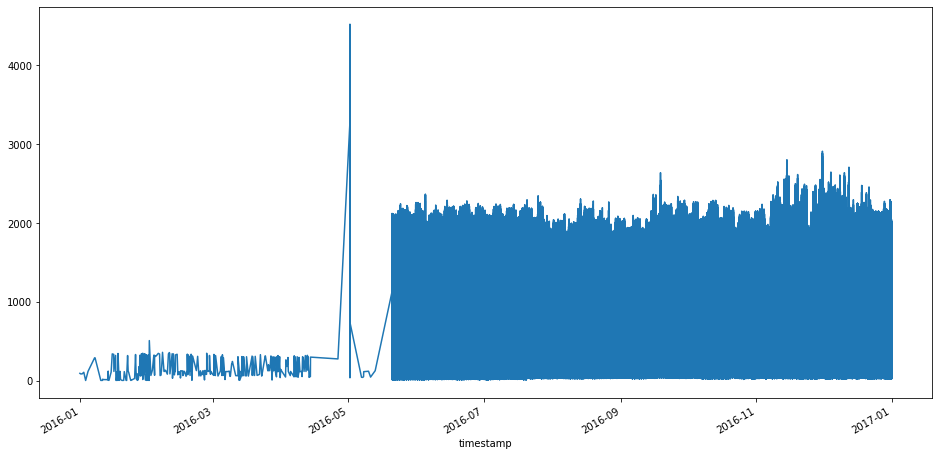

In [ ]:
p = df['meter_reading'].plot(figsize=(16,8))

In [ ]:
df['weekdays'] = ['']*df.shape[0]
for i,d in df.iterrows():
     df.loc[i,'weekdays'] = hari_[i.weekday()] 

df.head()    

KeyboardInterrupt: ignored

In [ ]:
df['Month'] = ['']*df.shape[0]
for i,d in df.iterrows():
    df.loc[i,'Month'] = i.month 
    
df.head()

KeyboardInterrupt: ignored

In [ ]:
d

building_id                       12
meter_reading                114.329
primary_use      Lodging/residential
square_feet                    37100
year_built                    1999.0
floor_count                      NaN
weekdays                      Selasa
Month                               
Name: 2016-08-02 15:00:00, dtype: object

In [ ]:
df_month = df.resample("M").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
df_month.head()

,building_id,meter_reading,square_feet,year_built,floor_count
timestamp,,,,,
2016-01-31,17.950000,109.356909,79614.075000,1984.012500,NaN
2016-02-29,14.024096,166.246624,47441.759036,1986.349398,NaN
2016-03-31,13.250000,161.415797,43057.897727,1990.613636,NaN
2016-04-30,13.170213,180.450006,45760.085106,1991.787234,NaN
2016-05-31,24.334647,463.281626,70248.903279,1995.028978,NaN


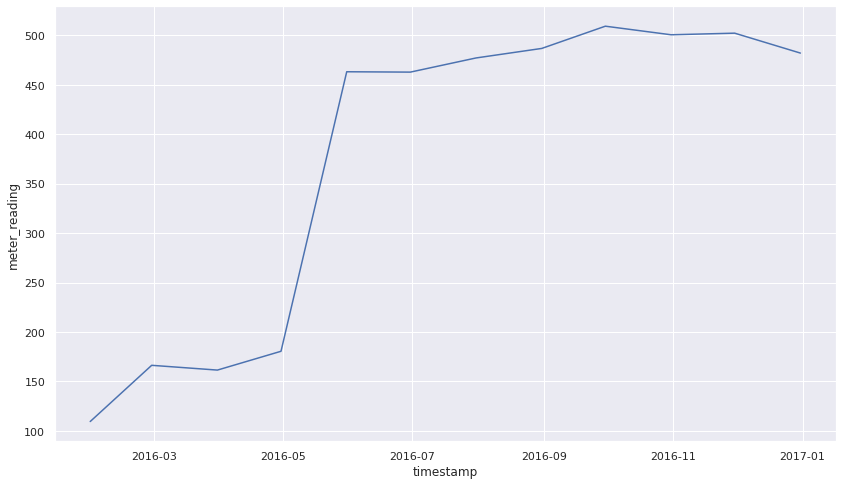

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(14, 8))
p = sns.lineplot(x='timestamp', y='meter_reading', data=df_month)
plt.show()

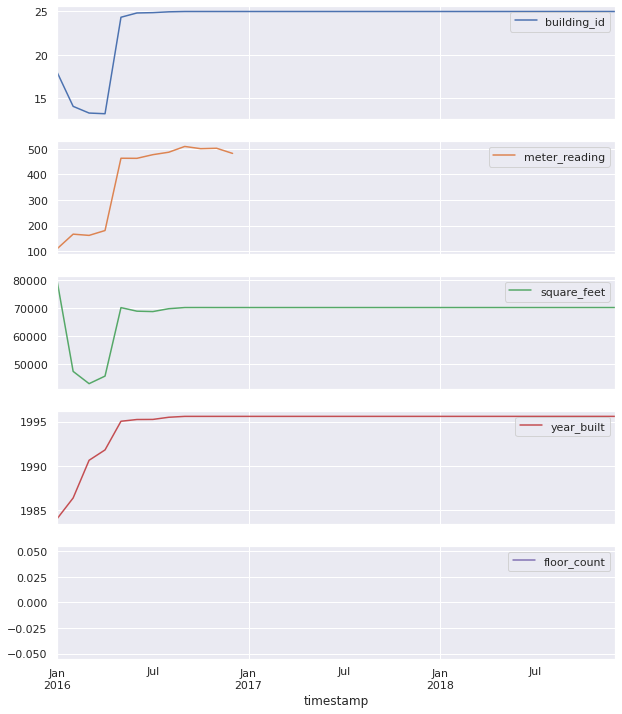

In [ ]:
p = df_month.plot(subplots=True, figsize=(10,12))

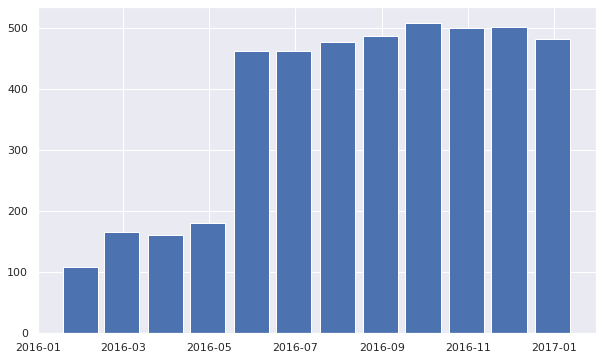

In [ ]:
import matplotlib.dates as mdates # Need this additional function

fig, ax = plt.subplots(figsize=(10, 6))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Supaya label lebih jelas
ax.bar(df_month['2016':].index, df_month.loc['2016':, "meter_reading"], width=25, align='center')

plt.show()

In [ ]:
df.primary_use.shift().head()

timestamp
2016-01-01 01:00:00          NaN
2016-01-01 09:00:00    Education
2016-01-02 01:00:00    Education
2016-01-02 19:00:00    Education
2016-01-03 15:00:00    Education
Name: primary_use, dtype: object

In [ ]:
p = df_month.loc['2016'].meter_reading.diff().plot(figsize=(18, 9))

diperlukannya data yang kurang disediakan yaitu pada meter reading dan floor count
pada tabel ini bisa dilihat bahwa peminjaman mulai meninggi dan stabil pada tanggal november 2016 


# Data Understanding

* **building_id** - Foreign key for the building metadata.
* **meter_reading** - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.
* **primary_use** - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
* **square_feet** - Gross floor area of the building
* **year_built** - Year building was opened
* **floor_count** - Number of floors of the building
* **air_temperature** - Degrees Celsius
* **cloud_coverage** - Portion of the sky covered in clouds, in oktas
* **dew_temperature** - Degrees Celsius
* **precip_depth_1_hr** - Millimeters
* **sea_level_pressure** - Millibar/hectopascals
* **wind_direction** - Compass direction (0-360)
* **wind_speed** - Meters per second

#### Beberapa variabel dan observasi dari data asal hilang karena tidak lagi relevant setelah proses wrangling.

* Baca lebih lanjut disini: https://www.kaggle.com/competitions/ashrae-energy-prediction/overview